In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
from glob import *
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
class_names = ['cylinder','cube']

def parse_image(filename):
  parts = tf.strings.split(filename, os.sep)
  label = parts[-2]

  image = tf.io.read_file(filename)
  image = tf.io.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [128, 128])
  return image, label

def process_path(file_path):
  label = tf.strings.split(file_path, os.sep)[-2]
  return tf.io.read_file(file_path), label

labeled_ds = list_ds.map(process_path)
def show(image, label):
  plt.figure()
  plt.imshow(image[:,:,0], cmap='gray')
  plt.title(label.numpy().decode('utf-8'))
  plt.axis('off')

def parse_image(filename):
  parts = tf.strings.split(filename, os.sep)
  label = parts[-2]

  image = tf.io.read_file(filename)
  image = tf.io.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  return image, label


TensorShape([300, 300, 1])


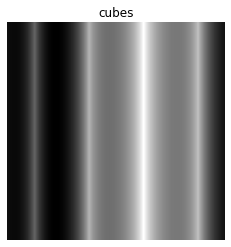

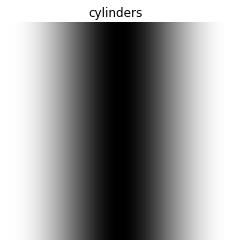

In [18]:
from numpy.core.fromnumeric import shape
list_ds = tf.data.Dataset.list_files("/content/drive/MyDrive/Colab Notebooks/data/cubes/*")

# for f in list_ds.take(5):
#   print(f.numpy())


file_path = next(iter(list_ds))
image, label = parse_image(file_path)
image
show(image, label)

image, label = parse_image("/content/drive/MyDrive/Colab Notebooks/data/cylinders/cylinder0.png")
tf.print(shape(image))
show(image, label)

In [22]:
batch_size = 32
img_height = 300
img_width = 300
data_dir = "/content/drive/MyDrive/Colab Notebooks/data"

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = .2,
    subset="training",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 210 files belonging to 2 classes.
Using 168 files for training.
Found 210 files belonging to 2 classes.
Using 42 files for validation.


In [20]:
class_names = train_ds.class_names
print(class_names)

['cubes', 'cylinders']


In [23]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [25]:
normalization_layer = layers.Rescaling(1./255)


model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 150, 150, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        1

In [26]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
6/6 [==============================] - 19s 3s/step - loss: 0.7826 - accuracy: 0.8690 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 2/10
6/6 [==============================] - 14s 2s/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 3.4727e-04 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 15s 2s/step - loss: 1.7633e-04 - accuracy: 1.0000 - val_loss: 3.4472e-05 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 14s 3s/step - loss: 1.1004e-05 - accuracy: 1.0000 - val_loss: 2.8979e-06 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 14s 2s/step - loss: 1.6334e-06 - accuracy: 1.0000 - val_loss: 8.3730e-07 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 14s 3s/step - loss: 5.7902e-07 - accuracy: 1.0000 - val_loss: 4.8819e-07 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 14s 2s/step - loss: 3.9807e-07 - accuracy: 1.0000 - val_loss: 3.5479e-07 - val_accurac